In [124]:
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt

df = pd.read_json("train.json", lines=True)

print(df.head())

                                                                                                                                                                                                                            question  \
0  Two friends plan to walk along a 43-km trail, starting at opposite ends of the trail at the same time. If Friend P's rate is 15% faster than Friend Q's, how many kilometers will Friend P have walked when they pass each other?   
1                                                          In the coordinate plane, points (x, 1) and (5, y) are on line k. If line k passes through the origin and has slope 1/5, then what are the values of x and y respectively?   
2                                                            For all numbers p and q, the operation @ is defined by p@q = p^2 - pq. If xy ≠ 0, then which of the following can be equal to zero?\nI. x@y\nII. (xy)@y\nIII. x@(x + y)   
3               Carl is facing very difficult financial times and can on

In [125]:
df.shape

(97467, 4)

In [126]:
df.columns

Index(['question', 'options', 'rationale', 'correct'], dtype='object')

In [127]:
new_data = df[['question', 'rationale']]
pd.set_option('display.max_colwidth', None)

In [128]:
new_data.head()

,question,rationale
0,"Two friends plan to walk along a 43-km trail, starting at opposite ends of the trail at the same time. If Friend P's rate is 15% faster than Friend Q's, how many kilometers will Friend P have walked when they pass each other?","If Q complete x kilometers, then P completes 1.15x kilometers.\nx + 1.15x = 43\n2.15x=43\nx = 43/2.15 = 20\nThen P will have have walked 1.15*20=23 km.\nThe answer is E."
1,"In the coordinate plane, points (x, 1) and (5, y) are on line k. If line k passes through the origin and has slope 1/5, then what are the values of x and y respectively?","Line k passes through the origin and has slope 1/5 means that its equation is y=1/5*x.\nThus: (x, 1)=(5, 1) and (5, y) = (5,1) -->x=5 and y=1\nAnswer: C"
2,"For all numbers p and q, the operation @ is defined by p@q = p^2 - pq. If xy ≠ 0, then which of the following can be equal to zero?\nI. x@y\nII. (xy)@y\nIII. x@(x + y)","p@q = p^2 - pq=p(p-q).... so p@q will be zero if p=q or p=0.. but a cannot be equal to 0.. as per Q, x and y can take any int value except 0...\nnow lets look at the choices..\nwhen x=y, it will be 0... so ok...\nwhen we put xy=y, it is possible when x=1 and y any integer... so ok again\nwhen we put x=x+y.... only possibility when y=0 and it is given x and y cannot be 0....so not possible\nonly l and ll possible ans B...."
3,"Carl is facing very difficult financial times and can only pay the interest on a $10,000 loan he has taken. The bank charges him a quarterly compound rate of 4%. What is the approximate interest he pays annually?","Usually, you are given the annual rate of interest and it is mentioned that it is annual rate.\nThe bank charges him a quarterly compounded ANNUAL rate of 16%.\nHere you find per quarter rate as (16/4)% = 4%\nI have actually never seen a question with quarter rate given but since this question did not mentionannual rate of interestand since the options did not make sense with 4% annual rate of interest, it is apparent that the intent was a 4% quarterly rate. So the bank charges 4% every quarter and compounds it in the next quarter. Had it been a simple quarterly rate, we would have just found 4 * 4% of 10,000 = $1600 as our answer.\nBut since, the interest is compounded, it will be a bit more than $1600. Option (A) looks correct."
4,"The speed at which a man can row a boat in still water is 25 kmph. If he rows downstream, where the speed of current is 11 kmph, what time will he take to cover 80 metres?",Speed of the boat downstream = 25 +11\n= 36 kmph\n= 36 * 5/18 = 10 m/s\nHence time taken to cover 80 m = 80/10\n= 8 seconds.\nAnswer:E


In [129]:
# Define a function to clip the last occurrence of \n in a sentence
def clip_sentence(sentence):
    return sentence.rsplit('\n', 1)[0]

# Apply the clipping operation to the "sentence" column
new_data["answer"] = new_data["rationale"].apply(clip_sentence)

/tmp/ipykernel_2008/2411044296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["answer"] = new_data["rationale"].apply(clip_sentence)


In [130]:
new_data.head()

,question,rationale,answer
0,"Two friends plan to walk along a 43-km trail, starting at opposite ends of the trail at the same time. If Friend P's rate is 15% faster than Friend Q's, how many kilometers will Friend P have walked when they pass each other?","If Q complete x kilometers, then P completes 1.15x kilometers.\nx + 1.15x = 43\n2.15x=43\nx = 43/2.15 = 20\nThen P will have have walked 1.15*20=23 km.\nThe answer is E.","If Q complete x kilometers, then P completes 1.15x kilometers.\nx + 1.15x = 43\n2.15x=43\nx = 43/2.15 = 20\nThen P will have have walked 1.15*20=23 km."
1,"In the coordinate plane, points (x, 1) and (5, y) are on line k. If line k passes through the origin and has slope 1/5, then what are the values of x and y respectively?","Line k passes through the origin and has slope 1/5 means that its equation is y=1/5*x.\nThus: (x, 1)=(5, 1) and (5, y) = (5,1) -->x=5 and y=1\nAnswer: C","Line k passes through the origin and has slope 1/5 means that its equation is y=1/5*x.\nThus: (x, 1)=(5, 1) and (5, y) = (5,1) -->x=5 and y=1"
2,"For all numbers p and q, the operation @ is defined by p@q = p^2 - pq. If xy ≠ 0, then which of the following can be equal to zero?\nI. x@y\nII. (xy)@y\nIII. x@(x + y)","p@q = p^2 - pq=p(p-q).... so p@q will be zero if p=q or p=0.. but a cannot be equal to 0.. as per Q, x and y can take any int value except 0...\nnow lets look at the choices..\nwhen x=y, it will be 0... so ok...\nwhen we put xy=y, it is possible when x=1 and y any integer... so ok again\nwhen we put x=x+y.... only possibility when y=0 and it is given x and y cannot be 0....so not possible\nonly l and ll possible ans B....","p@q = p^2 - pq=p(p-q).... so p@q will be zero if p=q or p=0.. but a cannot be equal to 0.. as per Q, x and y can take any int value except 0...\nnow lets look at the choices..\nwhen x=y, it will be 0... so ok...\nwhen we put xy=y, it is possible when x=1 and y any integer... so ok again\nwhen we put x=x+y.... only possibility when y=0 and it is given x and y cannot be 0....so not possible"
3,"Carl is facing very difficult financial times and can only pay the interest on a $10,000 loan he has taken. The bank charges him a quarterly compound rate of 4%. What is the approximate interest he pays annually?","Usually, you are given the annual rate of interest and it is mentioned that it is annual rate.\nThe bank charges him a quarterly compounded ANNUAL rate of 16%.\nHere you find per quarter rate as (16/4)% = 4%\nI have actually never seen a question with quarter rate given but since this question did not mentionannual rate of interestand since the options did not make sense with 4% annual rate of interest, it is apparent that the intent was a 4% quarterly rate. So the bank charges 4% every quarter and compounds it in the next quarter. Had it been a simple quarterly rate, we would have just found 4 * 4% of 10,000 = $1600 as our answer.\nBut since, the interest is compounded, it will be a bit more than $1600. Option (A) looks correct.","Usually, you are given the annual rate of interest and it is mentioned that it is annual rate.\nThe bank charges him a quarterly compounded ANNUAL rate of 16%.\nHere you find per quarter rate as (16/4)% = 4%\nI have actually never seen a question with quarter rate given but since this question did not mentionannual rate of interestand since the options did not make sense with 4% annual rate of interest, it is apparent that the intent was a 4% quarterly rate. So the bank charges 4% every quarter and compounds it in the next quarter. Had it been a simple quarterly rate, we would have just found 4 * 4% of 10,000 = $1600 as our answer."
4,"The speed at which a man can row a boat in still water is 25 kmph. If he rows downstream, where the speed of current is 11 kmph, what time will he take to cover 80 metres?",Speed of the boat downstream = 25 +11\n= 36 kmph\n= 36 * 5/18 = 10 m/s\nHence time taken to cover 80 m = 80/10\n= 8 seconds.\nAnswer:E,Speed of the boat downstream = 25 +11\

In [131]:
train_data = new_data[['question', 'answer']]

In [132]:
total_text_length = train_data['question'].str.len().sum()
print(total_text_length)

total_word_count = train_data['question'].str.split().str.len().sum()
print(total_word_count)

total_sentence_count = train_data['question'].str.count('\.').sum()
print(total_sentence_count)

15895726
3174388
154357


In [133]:
total_text_length = train_data['answer'].str.len().sum()
print(total_text_length)

total_word_count = train_data['answer'].str.split().str.len().sum()
print(total_word_count)

total_sentence_count = train_data['answer'].str.count('\.').sum()
print(total_sentence_count)

17881949
3817659
285478


In [134]:
import re

# Count the number of digits in the column
digit_count = train_data['question'].str.count(r'\d').sum()
print(digit_count)

# Count the number of numbers in the column
number_count = train_data['question'].str.count(r'\d+').sum()
print(number_count)

604302
339658


In [135]:
# Count the number of digits in the column
digit_count = train_data['answer'].str.count(r'\d').sum()
print(digit_count)

# Count the number of numbers in the column
number_count = train_data['answer'].str.count(r'\d+').sum()
print(number_count)

2325382
1341868


In [136]:
def clean_text(text):
    text = text.replace('\n',' ')
    text = text.replace('*', ' * ')
    text = text.replace('/', ' / ')
    text = text.replace('=', ' = ')
    text = text.replace(',', ' , ')
    text = text.replace('(', ' ( ')
    text = text.replace(')', ' ) ')
    return text


def count_words_and_digits(df, column_name, new_column_name1, new_column_name2):
    # Count the number of words in each element of the specified column
    word_counts = df[column_name].apply(lambda x: len(str(x).split()))
    df[column_name] = df[column_name].apply(clean_text)
    digit_counts = df[column_name].apply(lambda x: sum(1 for token in str(x).split() if re.match(r'\d+', token)))
    
    df[new_column_name1] = word_counts
    df[new_column_name2] = digit_counts
    
    return df

In [137]:
train_data = count_words_and_digits(train_data, "question", "question_word_count", "question_number_count")
train_data = count_words_and_digits(train_data, "answer", "answer_word_count", "answer_number_count")

/tmp/ipykernel_2008/3658390346.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(clean_text)


In [138]:
train_data.head()

,question,answer,question_word_count,question_number_count,answer_word_count,answer_number_count
0,"Two friends plan to walk along a 43-km trail , starting at opposite ends of the trail at the same time. If Friend P's rate is 15% faster than Friend Q's , how many kilometers will Friend P have walked when they pass each other?","If Q complete x kilometers , then P completes 1.15x kilometers. x + 1.15x = 43 2.15x = 43 x = 43 / 2.15 = 20 Then P will have have walked 1.15 * 20 = 23 km.",43,2,29,11
1,"In the coordinate plane , points ( x , 1 ) and ( 5 , y ) are on line k. If line k passes through the origin and has slope 1 / 5 , then what are the values of x and y respectively?","Line k passes through the origin and has slope 1 / 5 means that its equation is y = 1 / 5 * x. Thus: ( x , 1 ) = ( 5 , 1 ) and ( 5 , y ) = ( 5 , 1 ) -->x = 5 and y = 1",35,4,28,12
2,"For all numbers p and q , the operation @ is defined by p@q = p^2 - pq. If xy ≠ 0 , then which of the following can be equal to zero? I. x@y II. ( xy ) @y III. x@ ( x + y )","p@q = p^2 - pq = p ( p-q ) .... so p@q will be zero if p = q or p = 0.. but a cannot be equal to 0.. as per Q , x and y can take any int value except 0... now lets look at the choices.. when x = y , it will be 0... so ok... when we put xy = y , it is possible when x = 1 and y any integer... so ok again when we put x = x+y.... only possibility when y = 0 and it is given x and y cannot be 0....so not possible",39,1,84,7
3,"Carl is facing very difficult financial times and can only pay the interest on a $10 , 000 loan he has taken. The bank charges him a quarterly compound rate of 4%. What is the approximate interest he pays annually?","Usually , you are given the annual rate of interest and it is mentioned that it is annual rate. The bank charges him a quarterly compounded ANNUAL rate of 16%. Here you find per quarter rate as ( 16 / 4 ) % = 4% I have actually never seen a question with quarter rate given but since this question did not mentionannual rate of interestand since the options did not make sense with 4% annual rate of interest , it is apparent that the intent was a 4% quarterly rate. So the bank charges 4% every quarter and compounds it in the next quarter. Had it been a simple quarterly rate , we would have just found 4 * 4% of 10 , 000 = $1600 as our answer.",38,2,120,11
4,"The speed at which a man can row a boat in still water is 25 kmph. If he rows downstream , where the speed of current is 11 kmph , what time will he take to cover 80 metres?",Speed of the boat downstream = 25 +11 = 36 kmph = 36 * 5 / 18 = 10 m / s Hence time taken to cover 80 m = 80 / 10 = 8 seconds.,37,3,30,10


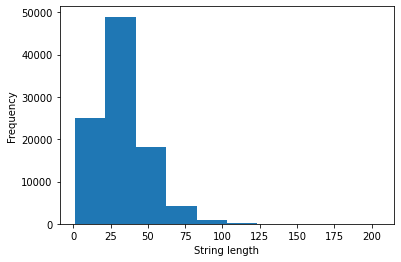

In [139]:
# plot a histogram of the string lengths
plt.hist(train_data["question_word_count"])
plt.xlabel('String length')
plt.ylabel('Frequency')
plt.show()

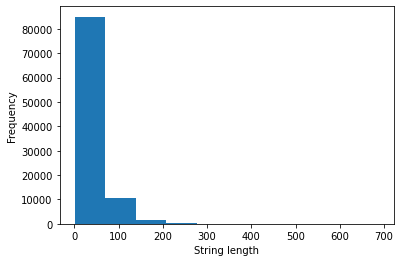

In [140]:
# plot a histogram of the string lengths
plt.hist(train_data["answer_word_count"])
plt.xlabel('String length')
plt.ylabel('Frequency')
plt.show()

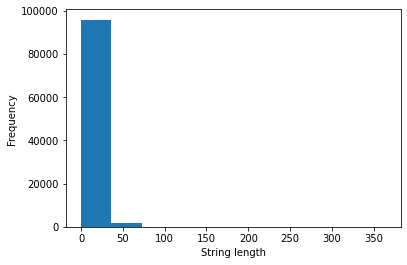

In [141]:
# plot a histogram of the string lengths
plt.hist(train_data["answer_number_count"])
plt.xlabel('String length')
plt.ylabel('Frequency')
plt.show()

In [142]:
len(train_data[train_data["answer_number_count"] >= 6])

76322

In [143]:
### Since we will be masking the answer numbers hence we need a minimum count of numbers in the answers
train_data = train_data[train_data["answer_number_count"] >= 6]

In [144]:
train_data.columns

Index(['question', 'answer', 'question_word_count', 'question_number_count',
       'answer_word_count', 'answer_number_count'],
      dtype='object')

In [145]:
# Assuming you have two columns 'column1' and 'column2' in your DataFrame
train_data['text'] = train_data['question'] + ' [Answer] ' + train_data['answer']

In [146]:
train_data['text_length']  = train_data['text'] .apply(lambda x: len(str(x).split()))

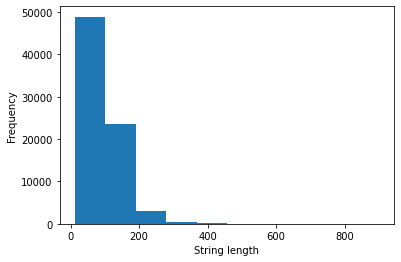

In [147]:
# plot a histogram of the string lengths
plt.hist(train_data['text_length'])
plt.xlabel('String length')
plt.ylabel('Frequency')
plt.show()

In [148]:
len(train_data[train_data["text_length"] < 40])

3427

In [149]:
len(train_data[train_data["text_length"] > 470])

55

In [150]:
#train_data = train_data[train_data["text_length"] >= 40]

In [151]:
train_data = train_data[train_data["text_length"] < 470]

In [152]:
train_data.shape

(76267, 8)

In [153]:
train_data = train_data[['text']]

In [154]:
### saving the train data as csv for training
train_data.to_csv('train_data.csv', index = False)

### saving the train data as csv for training
train_data.to_parquet('train_data.parquet', index = False)

In [129]:
### Doing the same preprocessing to make the validation dataset
df = pd.read_json("dev.json", lines=True)
new_data = df[['question', 'rationale']]
# Define a function to clip the last occurrence of \n in a sentence
def clip_sentence(sentence):
    return sentence.rsplit('\n', 1)[0]

# Apply the clipping operation to the "sentence" column
new_data["answer"] = new_data["rationale"].apply(clip_sentence)

val_data = new_data[['question', 'answer']]

def clean_text(text):
    text = text.replace('\n',' ')
    text = text.replace('*', ' * ')
    text = text.replace('/', ' / ')
    text = text.replace('=', ' = ')
    text = text.replace(',', ' , ')
    text = text.replace('(', ' ( ')
    text = text.replace(')', ' ) ')
    return text


def count_words_and_digits(df, column_name, new_column_name1, new_column_name2):
    # Count the number of words in each element of the specified column
    word_counts = df[column_name].apply(lambda x: len(str(x).split()))
    df[column_name] = df[column_name].apply(clean_text)
    digit_counts = df[column_name].apply(lambda x: sum(1 for token in str(x).split() if re.match(r'\d+', token)))
    
    df[new_column_name1] = word_counts
    df[new_column_name2] = digit_counts
    
    return df
	
	
val_data = count_words_and_digits(val_data, "question", "question_word_count", "question_number_count")
val_data = count_words_and_digits(val_data, "answer", "answer_word_count", "answer_number_count")

### Since we will be masking the answer numbers hence we need a minimum count of numbers in the answers
val_data = val_data[val_data["answer_number_count"] >= 6]

# Assuming you have two columns 'column1' and 'column2' in your DataFrame
val_data['text'] = val_data['question'] + ' [Answer] ' + val_data['answer']

val_data = val_data[['text']]

### saving the train data as csv for training
val_data.to_csv('val_data.csv', index = False)

/tmp/ipykernel_141/255053195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["answer"] = new_data["rationale"].apply(clip_sentence)
/tmp/ipykernel_141/255053195.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(clean_text)
/tmp/ipykernel_141/255053195.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [101]:
### Testing the masking PATTERN

In [102]:
import math
import numpy as np
import random

def clean_text(text):
    text = text.replace('Example of text:', '')
    text = text.replace('Example of Summary:', '')
    text = text.replace('\n','')
    text = text.replace('``', '')
    text = text.replace('"', '')
    return text

def span_corruption_mask(text, noise_span_length=3, noise_density=.15):
    max_index = len(text.split())
    mask = max_index * [0]
    span_num = math.ceil(( max_index * noise_density ) / 3 )
    exclude=[max_index-2, max_index-1]
    for i in range(span_num):
        while True:
            rand_num = np.random.randint(low=0, high=max_index)
            if rand_num not in exclude:
                span = [rand_num, rand_num+1, rand_num+2]
                for s in span:
                    mask[s] = 1
                    exclude.append(s)
                if rand_num==1:
                    exclude.append(rand_num-1)
                elif rand_num==2:
                    exclude.append(rand_num-1)
                    exclude.append(rand_num-2)
                elif rand_num>2:
                    exclude.append(rand_num-1)
                    exclude.append(rand_num-2)
                    exclude.append(rand_num-3)
                if not rand_num==max_index-3:
                    exclude.append(span[-1]+1)
                break
            else:
                continue
    return mask

def noise_span_to_unique_sentinel(text, mask, sentinels):
    tokens = text.split()
    text_ = []
    one_count=0
    sentinel_cnt=0
    for i in range(len(tokens)):
        if mask[i] == 1:
            one_count+=1
            if one_count==1:
                text_.append(sentinels[sentinel_cnt])
                sentinel_cnt+=1
            else:
                if one_count==3:
                    one_count=0
        else:
            text_.append(tokens[i])
    text_ = ' '.join(text_)
    return text_

def nonnoise_span_to_unique_sentinel(text, mask, sentinels):
    tokens = text.split()
    text_ = []
    zero_first=True
    sentinel_cnt=0
    for i in range(len(tokens)):
        if mask[i] == 0:
            if zero_first:
                text_.append(sentinels[sentinel_cnt])
                zero_first=False
                sentinel_cnt+=1
        else:
            zero_first=True
            text_.append(tokens[i])
    text_ = ' '.join(text_)
    return text_

text = "This is an example sentence to test masking."
cleaned_text = clean_text(text)
mask = span_corruption_mask(cleaned_text)
sentinels = ["<mask_1>", "<mask_2>", "<mask_3>"]
masked_text = noise_span_to_unique_sentinel(cleaned_text, mask, sentinels)
unmasked_text = nonnoise_span_to_unique_sentinel(cleaned_text, mask, sentinels)

print("Original Text:", text)
print("Cleaned Text:", cleaned_text)
print("Masked Text:", masked_text)
print("Unmasked Text:", unmasked_text)


Original Text: This is an example sentence to test masking.
Cleaned Text: This is an example sentence to test masking.
Masked Text: This <mask_1> sentence to test masking.
Unmasked Text: <mask_1> is an example <mask_2>


In [155]:
### Numeric masking strategy

import random
import re

def clean_text(text):
    text = text.replace('Example of text:', '')
    text = text.replace('Example of Summary:', '')
    text = text.replace('\n', ' ')
    text = text.replace('``', '')
    text = text.replace('"', '')
    return text

def remove_values_less_than(numbers, threshold):
    return [num for num in numbers if num >= threshold]

def select_random_percentage(lst, percentage):
    num_values = int(len(lst) * (percentage / 100))
    random_values = random.sample(lst, num_values)
    sorted_values = sorted(random_values)
    return sorted_values

def mask_numeric_spans(text, mask_ratio, noise_span_length):
    tokens = text.split()
    mask_started = False
    masked_tokens = []
    mask = [0] * len(tokens)
    
    for i, token in enumerate(tokens):
        if token == "[Answer]":
            start_index = i+1
            
    digit_indices = [j for j, token in enumerate(tokens) if re.match(r'\d+', token)]    
    mask_digit_index = remove_values_less_than(digit_indices, start_index)
    mask_digit_index = mask_digit_index[:-2]
    random_mask_index = select_random_percentage(mask_digit_index, mask_ratio)
    
    for i in random_mask_index:
        for j in range(noise_span_length):
            if j < noise_span_length:
                mask[i+j] = 1
            else:
                mask[i-1] = 1

    return mask


def noise_span_to_unique_sentinel(text, mask, sentinels):
    tokens = text.split()
    text_ = []
    one_count=0
    sentinel_cnt=0
    for i in range(len(tokens)):
        if mask[i] == 1:
            one_count+=1
            if one_count==1:
                text_.append(sentinels[sentinel_cnt])
                sentinel_cnt+=1
            else:
                if one_count==3:
                    one_count=0
        else:
            text_.append(tokens[i])
    text_ = ' '.join(text_)
    return text_

def nonnoise_span_to_unique_sentinel(text, mask, sentinels):
    tokens = text.split()
    text_ = []
    zero_first=True
    sentinel_cnt=0
    for i in range(len(tokens)):
        if mask[i] == 0:
            if zero_first:
                text_.append(sentinels[sentinel_cnt])
                zero_first=False
                sentinel_cnt+=1
        else:
            zero_first=True
            text_.append(tokens[i])
    text_ = ' '.join(text_)
    return text_

text = "Two friends plan to walk along a 43-km trail, starting at opposite ends of the trail at the same time. If Friend P's rate is 15% faster than Friend Q's, how many kilometers will Friend P have walked when they pass each other? [Answer] If Q completes 10 kilometers, then P completes 1.15 * 10 kilometers.\n10 + 1.15 * 10 = 43\n2.15 * 10 = 43\n10 = 43 / 2.15 = 20\nThen P will have walked 1.15 * 20 = 23 km."

cleaned_text = clean_text(text)
mask = mask_numeric_spans(cleaned_text, mask_ratio = 50, noise_span_length=3)
sentinels=[]
for i in range(100):
    sentinels.append(f'<extra_id_{i}>')
input_ = noise_span_to_unique_sentinel(text,mask,sentinels)
target_ = nonnoise_span_to_unique_sentinel(text,mask,sentinels)

print("Input Text:", input_)
print("Target Text:",target_)

#masked_text, mask = mask_numeric_spans(cleaned_text, mask_ratio=50)

#print("Original Text:", text)
#print("Cleaned Text:", cleaned_text)
#print("Masked Text:", masked_text)
#print("Mask:", mask)


Input Text: Two friends plan to walk along a 43-km trail, starting at opposite ends of the trail at the same time. If Friend P's rate is 15% faster than Friend Q's, how many kilometers will Friend P have walked when they pass each other? [Answer] If Q completes 10 kilometers, then P completes <extra_id_0> <extra_id_1> <extra_id_2> = <extra_id_3> 10 = 43 10 = 43 / <extra_id_4> <extra_id_5> will have walked 1.15 * 20 = 23 km.
Target Text: <extra_id_0> 1.15 * 10 kilometers. 10 + 1.15 * 10 <extra_id_1> 43 2.15 * <extra_id_2> 2.15 = 20 Then P <extra_id_3>


In [159]:
from string import punctuation
import string
set(string.punctuation)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}